# Objetivos

Implementar e testar a solução analítica para o problema de regressão linear 

Este notebook depende de módulos auxiliares que estão na pasta util/ mais alguns imports do Python

# Regressão linear: equações normais


Dado um dataset $\{(\mathbf{x}_{1}, y_{1}), \dots ,(\mathbf{x}_{N}, y_{N})\}$ onde $\mathbf{x}_i \in \mathbb{R}^{d}$ e $y_i \in \mathbb{R}$, queremos aproximar a função desconhecida $f:\mathbb{R}^{d} \rightarrow \mathbb{R}$ (lembrando que $y_i =f(\mathbf{x}_i)$) por meio de um modelo linear $h$:
$$
h(\mathbf{x}_{i}; \mathbf{w}, b) = \mathbf{w}^\top  \mathbf{x}_{i} + b
$$

Note que $h(\mathbf{x}_{i}; \mathbf{w}, b)$ é na verdade uma [transformação afim](https://en.wikipedia.org/wiki/Affine_transformation) de $\mathbf{x}_{i}$. Como em outros lugares, vamos usar o termo "linear" também para caracterizar uma transformação afim.

A saída de $h$ é uma transformação linear de $\mathbf{x}_{i}$. Usamos a notação $h(\mathbf{x}_{i}; \mathbf{w}, b)$ para deixar claro que $h$ é um modelo parametrizado, i.e., a transformação $h$ é definida pelos parâmetros $\mathbf{w}$ e $b$. Podemos pensar no vetor $\mathbf{w}$ como um vetor de *pesos* controlando o efeito de cada *feature* na predição.

Adicionando uma feature a mais na obsevação $\mathbf{x}_{i}$ (com o valor 1) -- coordenada artificial -- podemos simplificar a notação do modelo:

$$
h(\mathbf{x}_{i}; \mathbf{w}) = \hat{y}_{i} = \mathbf{w}^\top  \mathbf{x}_{i}
$$

Gostaríamos de encontrar os melhores parâmetros $\mathbf{w}$ de modo que a predição $\hat{y}_{i}$ seja a mais próxima de $y_{i}$ de acordo com alguma métrica de erro. Usando o *erro quadrárico médio* como tal métrica podemos obter a seguinte função de custo:

\begin{equation}
J(\mathbf{w}) = \frac{1}{N}\sum_{i=1}^{N}(\hat{y}_{i} - y_{i})^{2}
\end{equation}

Desse modo, a tarefa de achar a função $h$ mais próxima de $f$ se torna a tarefa de encontrar os valores de $\mathbf{w}$ para minimizar $J(\mathbf{w})$.

**Aqui vamos começar a explorar esse modelo olhando para um dataset bem simples**


In [1]:
# all imports
import numpy as np
import time
from util.util import get_housing_prices_data, r_squared
from util.plots import plot_points_regression 

%matplotlib inline

### O dataset

Os dados que vamos trabalhar são dados artificiais. Iremos gerar 100 observações com apenas uma *feature* e um valor asociado a cada uma delas. Podemos interpretar essas observações como sendo um par *(metros quadrados de um imóvel, preço desse imóvel em $)*. Nossa tarefa é construir um modelo que consiga predizer o valor dos imóveis, dadas as suas áreas.

In [2]:
X, y = get_housing_prices_data(N=100)


X shape = (100, 1)

y shape = (100, 1)

X:
mean 645.0, sdt 323.65, max 1200.0, min 90.0

y:
mean 44248.9609375, sdt 16733.96, max 75054.6328125, min 13240.595703125


### Plotando os dados

Acima temos algumas informações sobre os dados. Podemos também visualizar cada ponto.

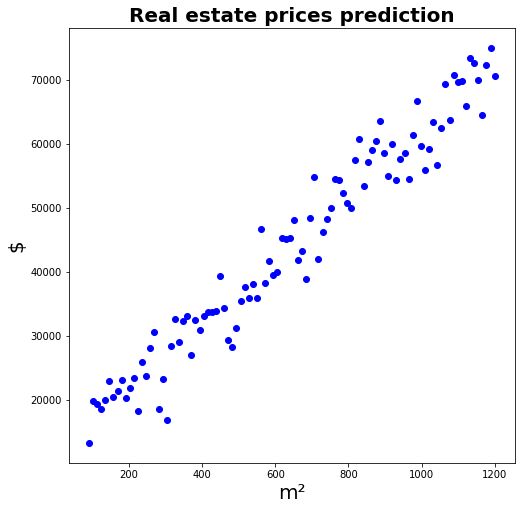

In [3]:
plot_points_regression(X,
                       y,
                       title='Real estate prices prediction',
                       xlabel="m\u00b2",
                       ylabel='$')

### Equações normais

Dados $f:\mathbb{R}^{n\times m} \rightarrow \mathbb{R}$ e $\mathbf{A} \in \mathbb{R}^{n\times m}$, definimos o gradiente de $f$ com respeito a $\mathbf{A}$ como:

\begin{equation*}
\nabla_{\mathbf{A}}f = \frac{\partial f}{\partial \mathbf{A}} =  \begin{bmatrix}
\frac{\partial f}{\partial \mathbf{A}_{1,1}} & \dots & \frac{\partial f}{\partial \mathbf{A}_{1,m}} \\
\vdots &  \ddots & \vdots \\
\frac{\partial f}{\partial \mathbf{A}_{n,1}} &  \dots & \frac{\partial f}{\partial \mathbf{A}_{n,m}}
\end{bmatrix}
\end{equation*}

Seja $\mathbf{X} \in \mathbb{R}^{N\times m}$ a matriz cujas linhas são as observações do dataset (também chamada de *design matrix*) e seja $\mathbf{y} \in \mathbb{R}^{N}$ o vetor contendo todos os valores de $y_{i}$ (i.e., $\mathbf{X}_{i,:} = \mathbf{x}_{i}$ e $\mathbf{y}_{i} =y_{i}$). É fácil checar que: 


\begin{equation}
J(\mathbf{w}) = \frac{1}{N}(\mathbf{X}\mathbf{w} - \mathbf{y})^{T}(\mathbf{X}\mathbf{w} - \mathbf{y})
\end{equation}


Usando certos conceitos básicos de derivada com matrizes podemos chegar no gradiente de $J(\mathbf{w})$ com respeito a $\mathbf{w}$:

\begin{equation}
\nabla_{\mathbf{w}}J(\mathbf{w}) = \frac{2}{N} (\mathbf{X}^{T}\mathbf{X}\mathbf{w} -\mathbf{X}^{T}\mathbf{y})   
\end{equation}

Assim, quando $\nabla_{\mathbf{w}}J(\mathbf{w}) = 0$ temos que 

\begin{equation}
\mathbf{X}^{T}\mathbf{X}\mathbf{w} = \mathbf{X}^{T}\mathbf{y}
\end{equation}

Desse modo,

\begin{equation}
\mathbf{w} = (\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T}\mathbf{y}
\end{equation}

A solução dada por essas equações são conhecidas como **equações normais**. Note que esse tipo de solução tem um custo, pois conforme cresce o número de variáveis, o tempo da inversão da matriz fica proibitivo. Vale a pena ler [esse material](http://cs229.stanford.edu/notes/cs229-notes1.pdf) para ver o argumento com mais detalhes.

### Exercício
Usando apenas a biblioteca **NumPy** (uma introdução rápida a certas funcionalidades dessa biblioteca pode ser encontrada [aqui](http://cs231n.github.io/python-numpy-tutorial/)), complete as duas funções abaixo. Lembre que $\mathbf{X} \in \mathbb{R}^{N\times d}$; assim, será preciso adicionar uma componente com valor 1 a cada observação em $\mathbf{X}$ para realizar a computação descrita acima.

In [23]:
def normal_equation_weights(X, y):
    """
    Calculates the weights of a linear function using the normal equation method.
    You should add into X a new column with 1s.

    :param X: design matrix
    :type X: np.ndarray(shape=(N, d))
    :param y: regression targets
    :type y: np.ndarray(shape=(N, 1))
    :return: weight vector
    :rtype: np.ndarray(shape=(d+1, 1))
    """
    
    # START OF YOUR CODE:
    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    Xt = np.transpose(X)
    w = np.dot(np.linalg.inv(np.dot(Xt, X)), np.dot(Xt, y))
    # END YOUR CODE

    return w

In [28]:
# teste da função normal_equation_weights()

w = 0  # isto é desnecessário
w = normal_equation_weights(X, y)
print("Estimated w = ", w)
print("w shape = ", w.shape)

Estimated w =  [[11708.28191581]
 [   50.45067086]]
w shape =  (2, 1)


In [29]:
def normal_equation_prediction(X, w):
    """
    Calculates the prediction over a set of observations X using the linear function
    characterized by the weight vector w.
    You should add into X a new column with 1s.

    :param X: design matrix
    :type X: np.ndarray(shape=(N, d))
    :param w: weight vector
    :type w: np.ndarray(shape=(d+1, 1))
    :param y: regression prediction
    :type y: np.ndarray(shape=(N, 1))
    """
    
    # START OF YOUR CODE:
    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    prediction = np.dot(X, w)
    # END YOUR CODE
    
    return prediction


Você pode usar a métrica [$R^2$](https://pt.wikipedia.org/wiki/R%C2%B2) para ver o quão bem o modelo linear está se ajustando aos dados.

**Nesse caso $𝑅^2$ tem que estar próximo de 0.5.**

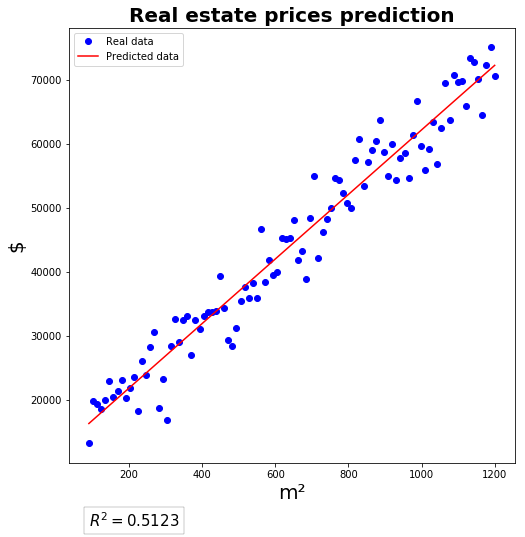

In [32]:
# teste da função normal_equation_prediction()
prediction = normal_equation_prediction(X, w)
r_2 = r_squared(y, prediction)
plot_points_regression(X,
                       y,
                       title='Real estate prices prediction',
                       xlabel="m\u00b2",
                       ylabel='$',
                       prediction=prediction,
                       legend=True,
                       r_squared=r_2)

## Testes adicionais

Vamos fazer a predição para $x=650$


In [33]:
# usando a função de predição
x = np.asarray([650]).reshape(1,1)
prediction = normal_equation_prediction(x, w)
print("Area = %.2f  Predicted price = %.4f" %(x[0], prediction))

# de forma mais direta
y = np.dot(np.asarray((1,x)), w)
print("Area = %.2f  Predicted price = %.4f" %(x, y))


Area = 650.00  Predicted price = 44501.2180
Area = 650.00  Predicted price = 44501.2180


## Efeito do número de amostras e dimensão dos dados

Varie o número de amostras $N$ e veja como varia o tempo de processamento.

Teste o seu código para dados nos quais $𝑑>1$.

In [34]:
# Teste para diferentes valores de N
X, y = get_housing_prices_data(N=1000000)
init = time.time()
w = normal_equation_weights(X, y)
prediction = normal_equation_prediction(X,w)
init = time.time() - init

print("Tempo de execução = {:.8f}(s)".format(init))


X shape = (1000000, 1)

y shape = (1000000, 1)

X:
mean 645.0000610351562, sdt 320.43, max 1200.0, min 90.0

y:
mean 44241.41015625, sdt 16518.67, max 87116.0625, min 940.042724609375
Tempo de execução = 0.03785396(s)


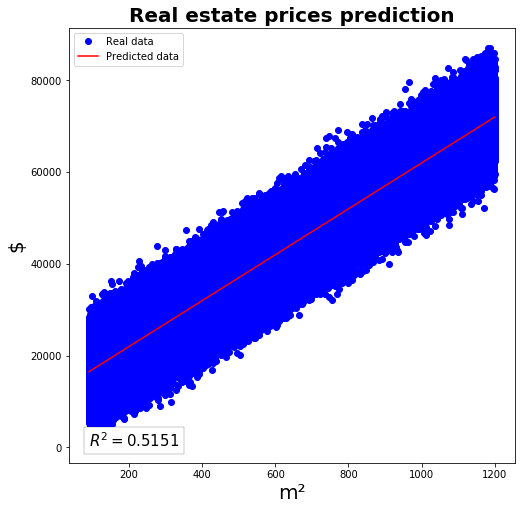

In [35]:
r_2 = r_squared(y, prediction)
plot_points_regression(X,
                       y,
                       title='Real estate prices prediction',
                       xlabel="m\u00b2",
                       ylabel='$',
                       prediction=prediction,
                       legend=True,
                       r_squared=r_2)

In [ ]:
# Teste para dados de dimensão d>1
